In [1]:
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mean_x = 2.79
mean_y = 2.75
mean_z = 2.58
center = center = np.array([mean_x,mean_y,mean_z])
l1 = np.array([-0.582671047, 0.386305430, 0.715026279])
l2 = np.array([ 6.16600437,  5.11369457,  4.45164039])
p = np.array([3.75, 4.25, 4.25])
eigenvector = np.array([-0.58267103476669901, 0.38630543034016956, 0.71502627905105753])

[ 3.37433771  2.36369457  1.86830706]
0.741722890767


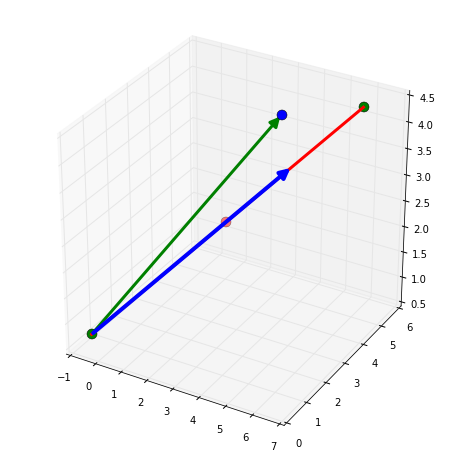

In [26]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
#mean
ax.plot([mean_x],[mean_y],[mean_z],'o',markersize=10,color='red',alpha=0.5)
#point
ax.plot([p[0]],[p[1]],[p[2]],'o',ms=10,c='b')
#end of eigenvector points
ax.plot([l1[0]],[l1[1]],[l1[2]],'o',ms=10,c='g')
ax.plot([l2[0]],[l2[1]],[l2[2]],'o',ms=10,c='g')
#eigenvector line
ax.plot([eigenvector[0] + (mean_x - eigenvector[0])*2, eigenvector[0]], 
        [eigenvector[1] + (mean_y - eigenvector[1])*2, eigenvector[1]], 
        [eigenvector[2] + (mean_z - eigenvector[2])*2, eigenvector[2]], 
        lw=3, color="r")#, arrowstyle="<|-|>",mutation_scale=10)

#add by Jie **********************************************************************
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
#plot original vector
a=Arrow3D([l1[0],p[0]],[l1[1],p[1]],[l1[2],p[2]],mutation_scale=20, lw=3,arrowstyle="-|>",color='g')
ax.add_artist(a)

#calculate the vector projection
pv=np.dot(l2-l1,p-l1)/np.dot(l2-l1,l2-l1)*(l2-l1)
print (l2-l1)*0.5

#plot the projected vector
a=Arrow3D([l1[0],l1[0]+pv[0]],[l1[1],l1[1]+pv[1]],[l1[2],l1[2]+pv[2]],mutation_scale=20, lw=4,arrowstyle="-|>",color='b', zorder=8)
ax.add_artist(a)

#calculate the indicator
DI=np.sqrt(np.dot(pv,pv)/np.dot(l2-l1,l2-l1))
print DI
plt.savefig(r'D:\Downloads\Mattijn@Jia\png\trial_7//pca_2.png', dpi=250)

In [23]:
np.sqrt(np.dot(pv,pv))

6.7106499999352334

In [24]:
np.sqrt(np.dot(l2-l1,l2-l1))

9.0473815537720288

In [4]:
d_to_line = np.linalg.norm(np.cross(l2-l1, l1-p))/np.linalg.norm(l2-l1)
d_to_center = np.linalg.norm(p-center)
deg_center_to_p_from_line = 180-(math.degrees(math.acos(d_to_line/d_to_center))+90)
d_to_coord = d_to_line / math.sin(deg_center_to_p_from_line)

print 'distance to line', d_to_line
print 'distance to center', d_to_center
print 'degree corner distance to center over distance to line', deg_center_to_p_from_line
print 'distance to coordinate',d_to_coord,'\n'

distance to line 1.07860554342
distance to center 2.44141352499
degree corner distance to center over distance to line 26.2184982275
distance to coordinate 1.21923639874 



[ 3.37433771  2.36369457  1.86830706]
0.741722890767
